In [1]:

from circuits.circuit_mobjects import *
import circuits.theoretical as tl
# from get_circuits import *
# import ElectricCircuitsManim.circuits as circuits
from manim import *

Manim Community v0.15.2

In [ ]:
%%manim -v WARNING -qm --flush_cache CircuitsTest2 

class CircuitsTest2(Scene):
    def construct(self):
        circuit = tl.ACCircuit(nodes=9, w=1)
        circuit.add(tl.Wire(0, 1))
        circuit.add(tl.Wire(1, 2))
        circuit.add(tl.IndependantVoltage(v=5, head=3, tail=0))
        # circuit.add(tl.Resistor(r=1, head=4, tail=1))
        # circuit.add(tl.Inductor(l=1, head=4, tail=1))
        circuit.add(tl.Capacitor(c=1, head=4, tail=1))
        circuit.add(tl.IndependantVoltage(v=4, head=5, tail=2))
        circuit.add(tl.Inductor(l=5, head=3, tail=4))
        circuit.add(tl.Resistor(r=2, head=4, tail=5))
        circuit.add(tl.Resistor(r=4, head=6, tail=3))
        circuit.add(tl.Resistor(r=3, head=7, tail=4))
        circuit.add(tl.DependantVoltage(a=3, dplus=4, dminus=1, head=8, tail=5))
        circuit.add(tl.Wire(head=6, tail=7))
        circuit.add(tl.IndependantVoltage(v=6, head=8, tail=7))

        circuit.nodal_analysis()
        circuit.calculate_currents()

        cmob_circuit = circuit.get_mobjects(
            [
                2 * LEFT + 2 * DOWN,
                2 * DOWN,
                2 * RIGHT + 2 * DOWN,
                2 * LEFT,
                ORIGIN,
                2 * RIGHT,
                2 * UP + 2 * LEFT,
                2 * UP,
                2 * UP + 2 * RIGHT
            ], mob_kwargs={
                (0, 3): {"label": "5V", "reverse_label": True},
                (1, 4): {"label": "1Ω"},
                (2, 5): {"label": "4V"},
                (3, 4): {"label": "5Ω"},
                (4, 5): {"label": "2Ω"},
                (3, 6): {"label": "4Ω", "reverse_label": True},
                (4, 7): {"label": "3Ω", "reverse_label": True},
                (5, 8): {"label": "3x"},
                (7, 8): {"label": "6V", "reverse_label": True}
            },
            do_colored_voltage=True
        )

        timer = cmob_circuit.get_timer()
        cmobjects = cmob_circuit.get_circuit_mobjects()
        currents = cmob_circuit.get_current_mobjects()

        time = 8 * np.pi
        self.add(cmobjects, currents)
        # self.play(Create(cmobjects), Create(currents), run_time=2)
        self.play(timer.animate.set_value(time), run_time=time, rate_func=linear)
        # self.wait()


In [2]:
%%manim -v WARNING -qm CircuitsTest1

class CircuitsTest1(Scene):
    def construct(self):
        line1 = Inductor(LEFT + DOWN, LEFT + UP, label="L", reverse_label=True)
        line2 = Capacitor(LEFT + UP, RIGHT + UP, label="C")
        line3 = Resistor(RIGHT + UP, RIGHT + DOWN, label="R")
        line4 = IndependantVoltage(RIGHT + DOWN, LEFT + DOWN, label="V")

        lines = VGroup(line1, line2, line3, line4)
        self.play(*[Create(line) for line in lines], run_time=2)
        self.play(line1.animate.set_reverse_label(False))
        # self.play(FadeIn(lines))
        # self.play(Create(lines), run_time=5)
        self.wait()

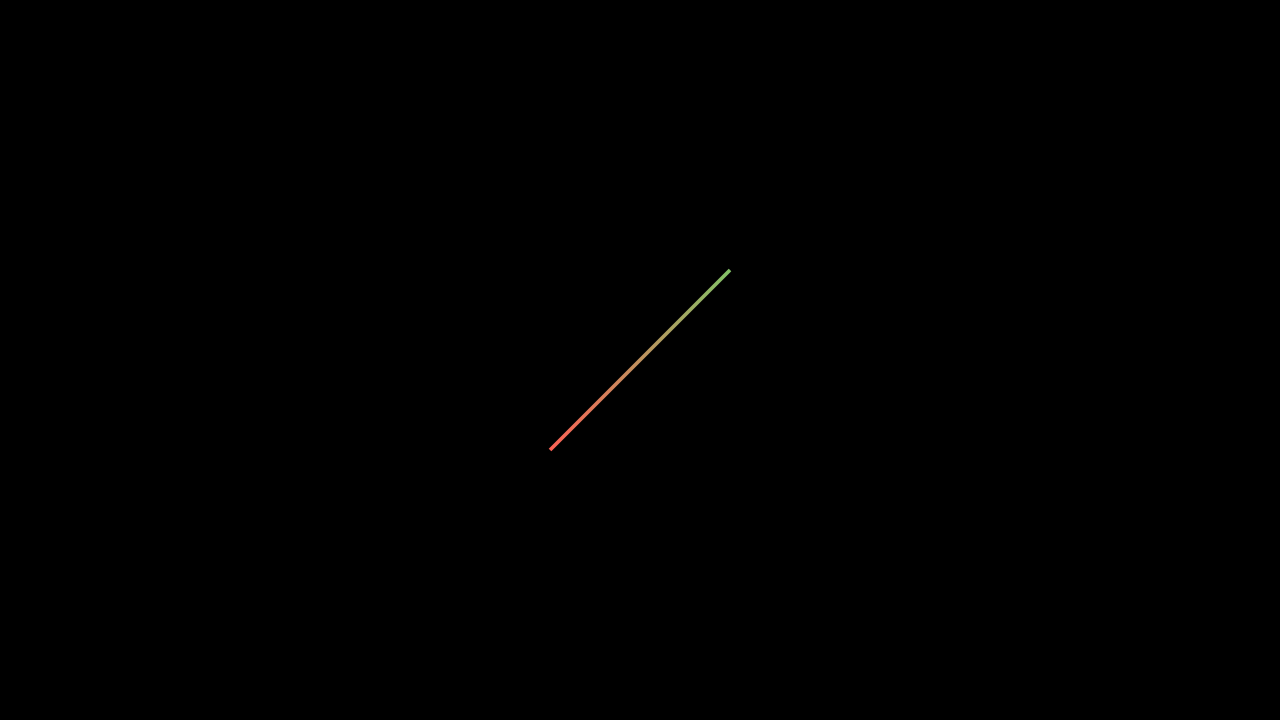

In [18]:
%%manim -v WARNING -qm Foolery3

def interpolate_color_with_midpoint(color1, color2, midpoint, midpoint_val, alpha):
    if alpha < midpoint_val:
        return interpolate_color(color1, midpoint, alpha / midpoint_val)
    else:
        return interpolate_color(midpoint, color2, (alpha - midpoint_val) / (1 - midpoint_val))

class Foolery3(Scene):
    def construct(self):
        # resistor = ResistorElement(LEFT, RIGHT, 0.5, 6)
        resistor = Line(UP + RIGHT, DOWN + LEFT, sheen_direction=UP + RIGHT)
        # resistor = Resistor(RIGHT, LEFT, do_colored_voltage=True, base_v=0, diff_v=1)
        resistor.set_color((RED, GREEN))
        self.add(resistor)


In [11]:
%%manim -v WARNING -qm Foolery4

class Foolery4(Scene):
    def construct(self):
        x = ValueTracker(-0.5)
        arrow = Arrow()
        arrow.add_updater(lambda a: a.move_to(x.get_value() * RIGHT))

        label = Text("I")
        label.add_updater(lambda l: l.next_to(arrow, UP))

        self.play(FadeIn(arrow), FadeIn(label), x.animate.set_value(0))
        self.wait()

        self.clear()

        x.set_value(-0.5)

        arrow = Arrow(DOWN, UP)
        arrow.add_updater(lambda a: a.move_to(x.get_value() * UP))

        label = Text("I")
        label.add_updater(lambda l: l.next_to(arrow, RIGHT))

        self.play(FadeIn(arrow), FadeIn(label), x.animate.set_value(0))
        self.wait()
